# AOU University
# WeCare: Graduation project
# Name: Mohamed Tarek Mohamed Elsaid
# ID: 2051711398
# Hepatitis C Notebook:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import  RandomizedSearchCV, train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from mlxtend.plotting import plot_confusion_matrix
import pickle
%matplotlib inline
#To turn off warning messages.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset 
data = pd.read_csv("HepatitisCdata.csv")  
data.head()  

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [3]:
data = data.drop(["Unnamed: 0"], axis = 1)  

In [4]:
data.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [5]:
#Size
data.shape

(615, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,615.0,47.408130,10.055105,19.00,39.000,47.00,54.000,77.00
ALB,614.0,41.620195,5.780629,14.90,38.800,41.95,45.200,82.20
ALP,597.0,68.283920,26.028315,11.30,52.500,66.20,80.100,416.60
ALT,614.0,28.450814,25.469689,0.90,16.400,23.00,33.075,325.30
AST,615.0,34.786341,33.090690,10.60,21.600,25.90,32.900,324.00
BIL,615.0,11.396748,19.673150,0.80,5.300,7.30,11.200,254.00
CHE,615.0,8.196634,2.205657,1.42,6.935,8.26,9.590,16.41
CHOL,605.0,5.368099,1.132728,1.43,4.610,5.30,6.060,9.67
CREA,615.0,81.287805,49.756166,8.00,67.000,77.00,88.000,1079.10
GGT,615.0,39.533171,54.661071,4.50,15.700,23.30,40.200,650.90


In [8]:
data.Category.unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [9]:
data.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


## Dealing with categorical data

In [10]:
#Convert categorical to binary in Category & Sex
data['Category'] = data['Category'].map({'0=Blood Donor': 0, 
                                         '0s=suspect Blood Donor': 0, 
                                         "1=Hepatitis" : 1, 
                                         "2=Fibrosis" : 1, 
                                         "3=Cirrhosis" : 1})

data['Sex'] = data['Sex'].map({'m': 1, 'f': 0})

In [11]:
#EDA
data.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

### Dealing with missing values

In [12]:
data.fillna(data.median() ,inplace=True)

In [13]:
data.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [14]:
n_cols = {'ALB':'Albumin Blood Test (ALB) g/L ',
            'ALP':  'Alkaline Phosphatase Test (ALP) IU/L',
            'ALT': 'Alanine Transaminase Test (ALT) U/L',
            'AST' : 'Aspartate Transaminase Test (AST) U/L',
            'BIL': 'Bilirubin Blood Test (BIL) µmol/L',
            'CHE' : 'Cholinesterase (CHE) kU/L' ,
            'CHOL' : 'Cholesterol (CHOL) mmol/L',
            'CREA' : 'Creatinine Blod Test (CREA) µmol/L',
            'GGT' : 'Gamma-Glutamyl Transpeptidase Test (GGT) U/L',
            'PROT' : 'Protein Blood Test (PROT) g/L'}

data.rename(columns=n_cols ,inplace=True)
data.head()

,Category,Age,Sex,Albumin Blood Test (ALB) g/L,Alkaline Phosphatase Test (ALP) IU/L,Alanine Transaminase Test (ALT) U/L,Aspartate Transaminase Test (AST) U/L,Bilirubin Blood Test (BIL) µmol/L,Cholinesterase (CHE) kU/L,Cholesterol (CHOL) mmol/L,Creatinine Blod Test (CREA) µmol/L,Gamma-Glutamyl Transpeptidase Test (GGT) U/L,Protein Blood Test (PROT) g/L
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


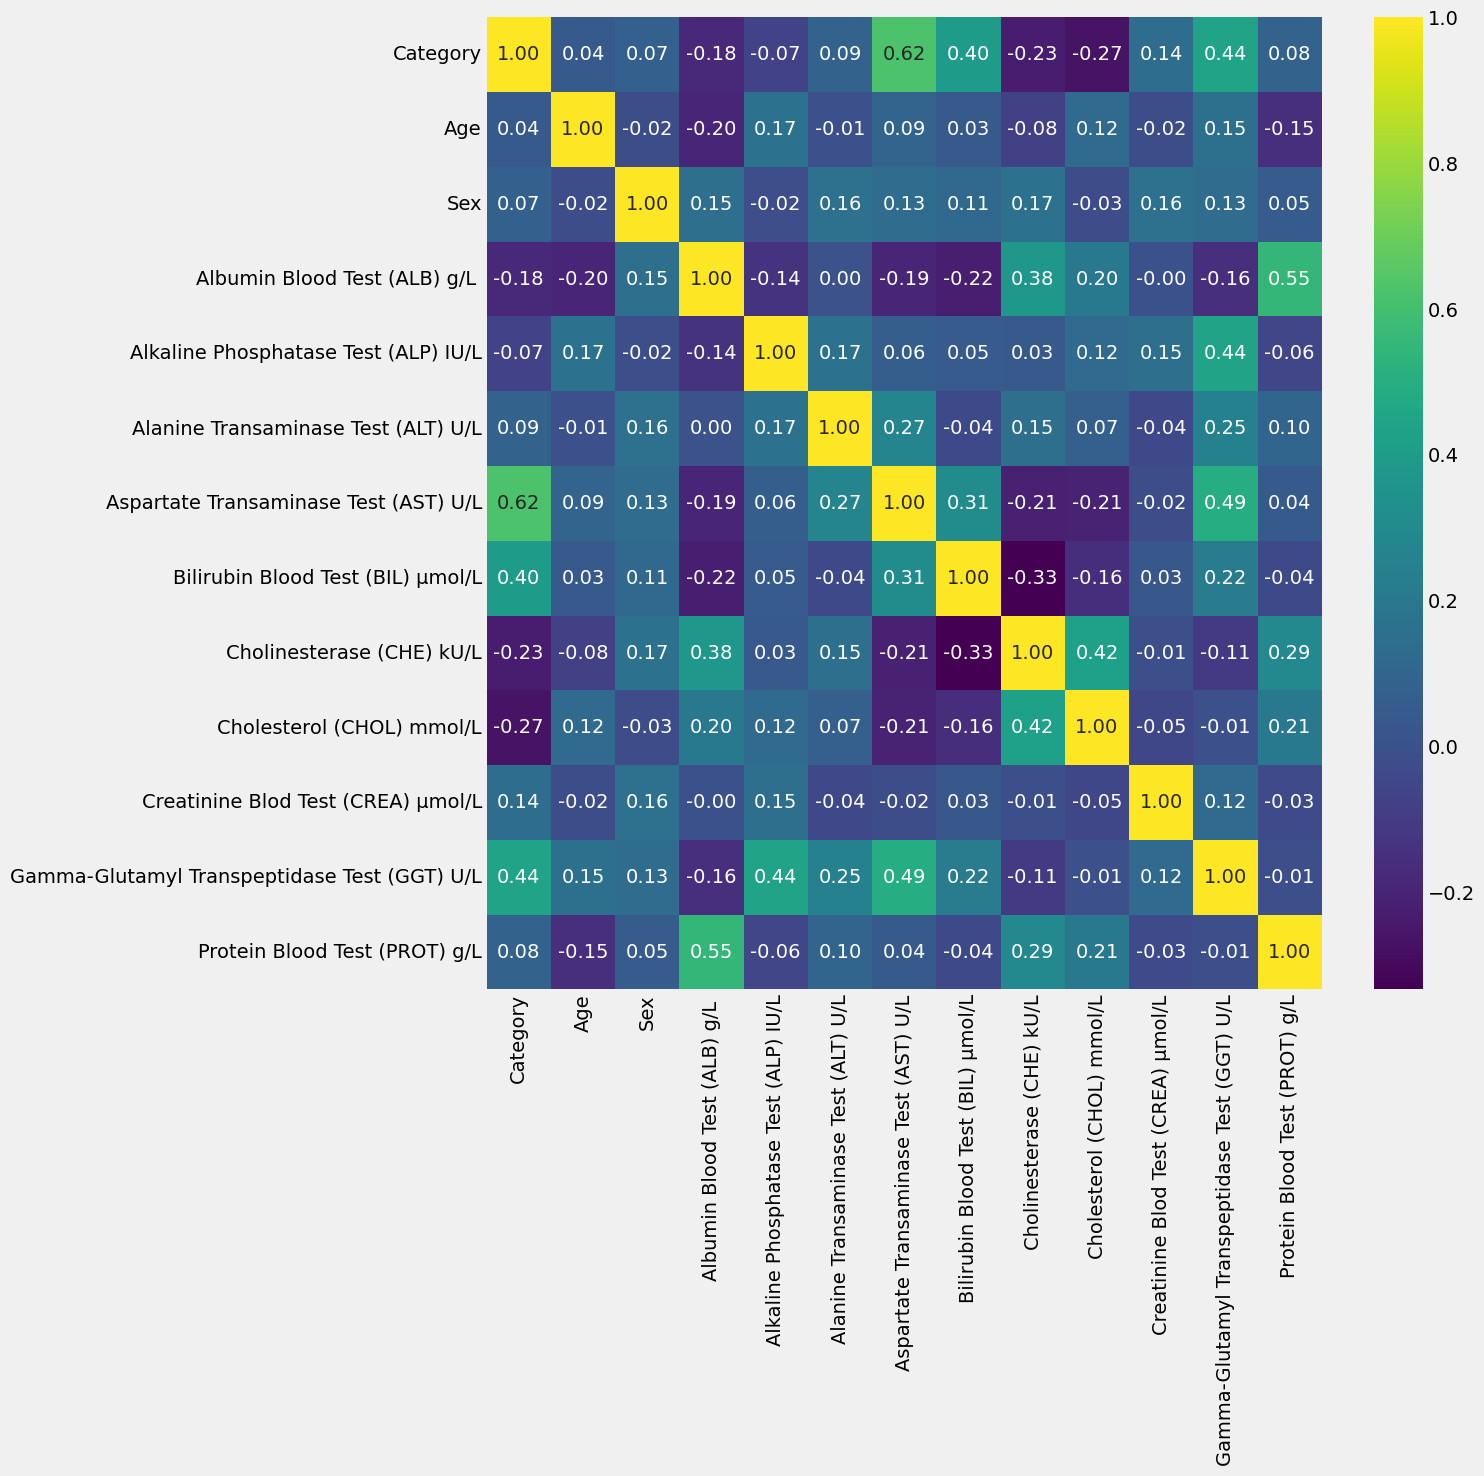

In [15]:
#Colerration check.
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(),annot=True,fmt = ".2f",cmap='viridis')
plt.show()

In [16]:
print(f'Good People : {data.Category.value_counts()[0]}')
print(f'Infected People : {data.Category.value_counts()[1]}')

Good People : 540
Infected People : 75


In [17]:
#Clculate age
minAge=min(data.Age)
maxAge=max(data.Age)
meanAge=data.Age.mean()
print("min =",minAge ,"max =", maxAge , "mean =",meanAge)

min = 19 max = 77 mean = 47.40813008130081


In [18]:
#Prepare ages for a bie chart
Young = data[(data.Age>=19)&(data.Age<30)]
Middle = data[(data.Age>=30)&(data.Age<48)]
Old = data[(data.Age>48)]

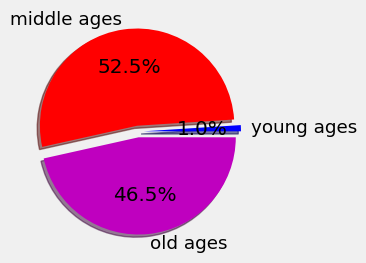

In [19]:
plt.style.use('fivethirtyeight')
colors = ['b','r','m']
explode = [0.06,0.06,0.06]
plt.figure(figsize=(5,3))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Old)],labels=['young ages','middle ages','old ages'],explode=explode,shadow=True,colors=colors, autopct='%1.1f%%')
plt.show()

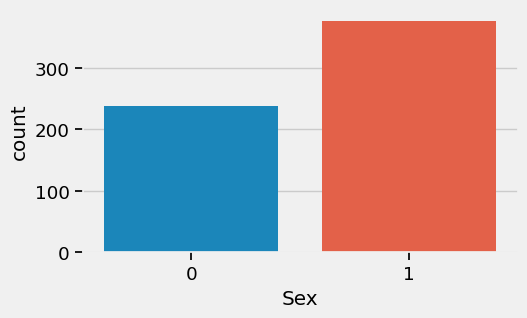

In [20]:
#Sex 
plt.figure(figsize=(5,3))
sns.countplot(x='Sex', data=data)
plt.show()

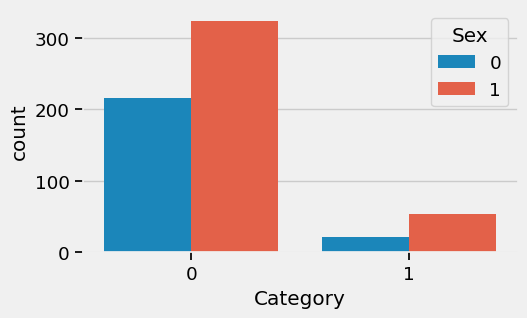

In [21]:
#Sex 
plt.figure(figsize=(5,3))
sns.countplot(x='Category', data=data, hue='Sex')
plt.show()

In [22]:
data.head()

,Category,Age,Sex,Albumin Blood Test (ALB) g/L,Alkaline Phosphatase Test (ALP) IU/L,Alanine Transaminase Test (ALT) U/L,Aspartate Transaminase Test (AST) U/L,Bilirubin Blood Test (BIL) µmol/L,Cholinesterase (CHE) kU/L,Cholesterol (CHOL) mmol/L,Creatinine Blod Test (CREA) µmol/L,Gamma-Glutamyl Transpeptidase Test (GGT) U/L,Protein Blood Test (PROT) g/L
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


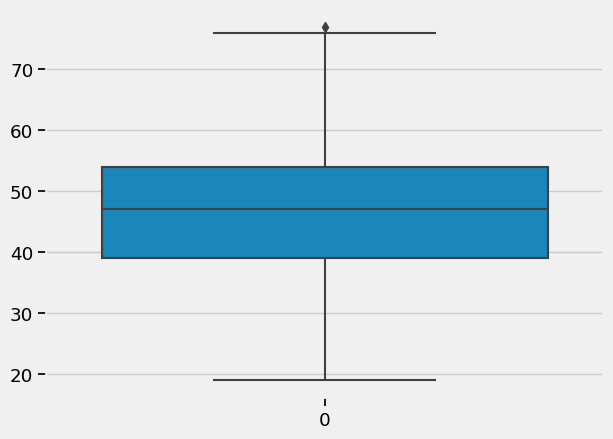

In [23]:
#outliers
sns.boxplot(data['Age'])
plt.show()

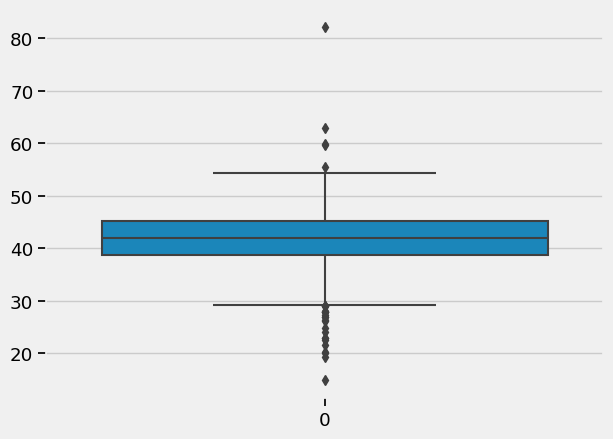

In [24]:
#outliers
sns.boxplot(data['Albumin Blood Test (ALB) g/L '])
plt.show()

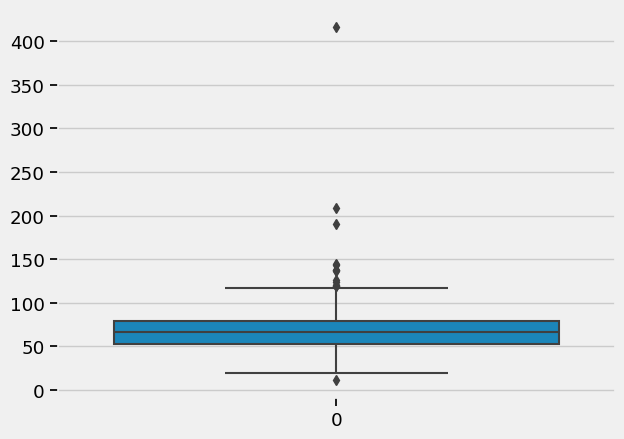

In [25]:
#outliers
sns.boxplot(data['Alkaline Phosphatase Test (ALP) IU/L'])
plt.show()

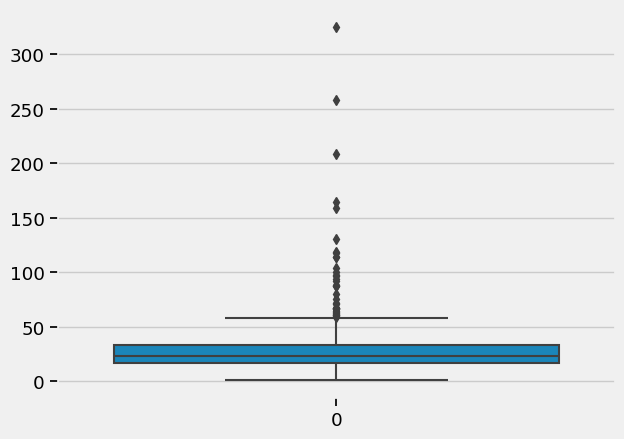

In [26]:
#outliers
sns.boxplot(data['Alanine Transaminase Test (ALT) U/L'])
plt.show()

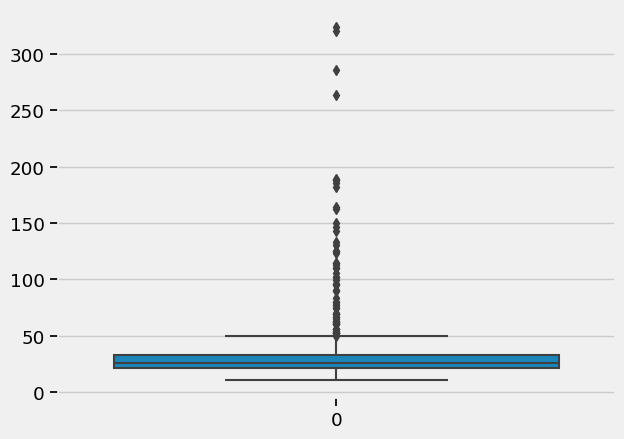

In [27]:
#outliers
sns.boxplot(data['Aspartate Transaminase Test (AST) U/L'])
plt.show()

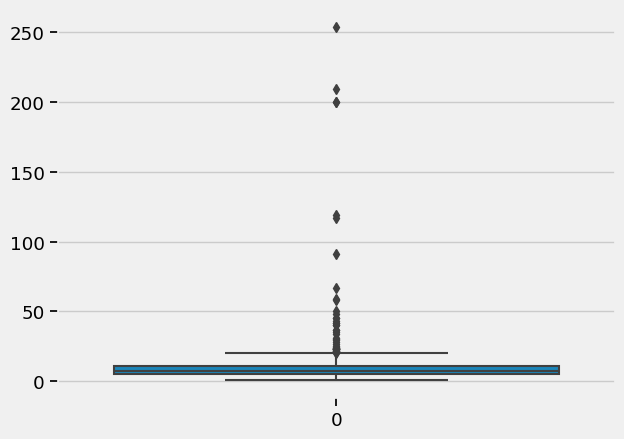

In [28]:
#outliers
sns.boxplot(data['Bilirubin Blood Test (BIL) µmol/L'])
plt.show()

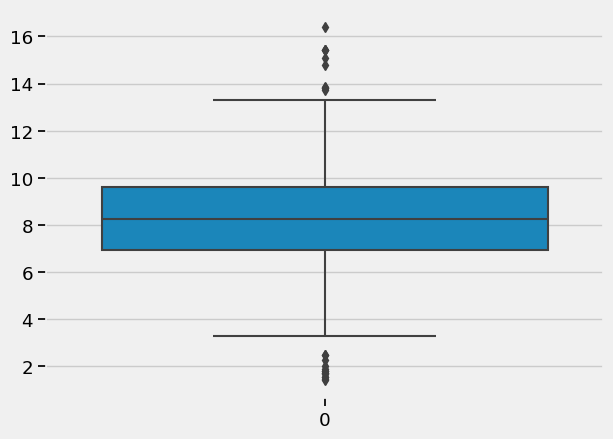

In [29]:
#outliers
sns.boxplot(data['Cholinesterase (CHE) kU/L'])
plt.show()

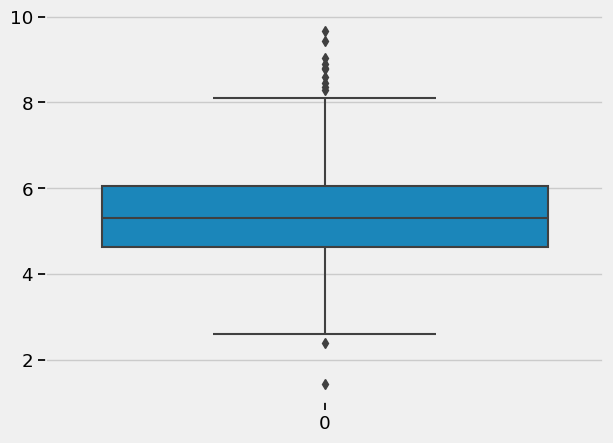

In [30]:
#outliers
sns.boxplot(data['Cholesterol (CHOL) mmol/L'])
plt.show()

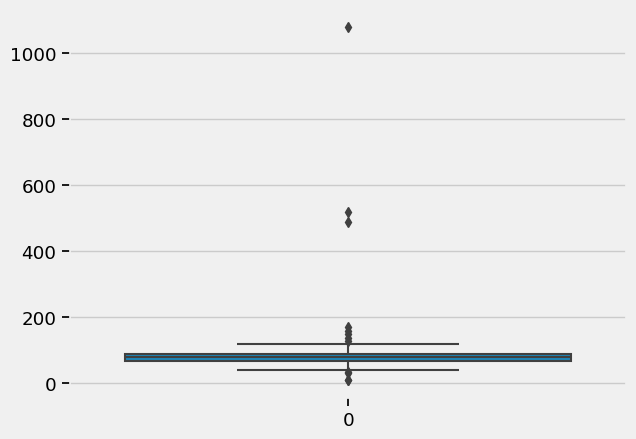

In [31]:
#outliers
sns.boxplot(data['Creatinine Blod Test (CREA) µmol/L'])
plt.show()

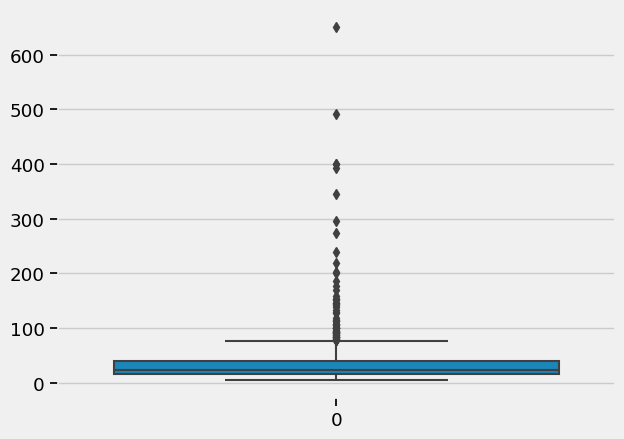

In [32]:
#outliers
sns.boxplot(data['Gamma-Glutamyl Transpeptidase Test (GGT) U/L'])
plt.show()

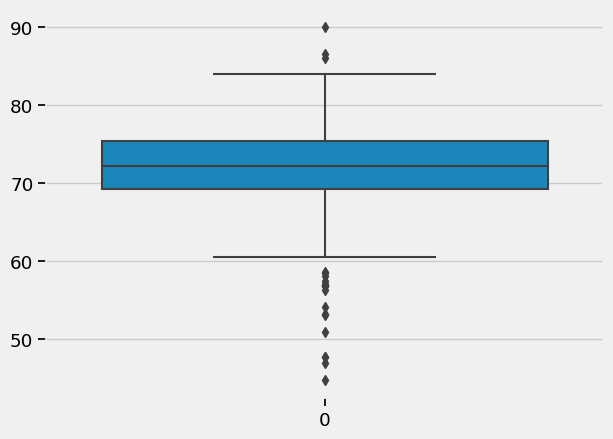

In [33]:
#outliers
sns.boxplot(data['Protein Blood Test (PROT) g/L'])
plt.show()

In [34]:
# outlier_indices = np.where(
#                            (data['Aspartate Transaminase Test (AST) U/L'] >= 50) | 
#                            (data['Gamma-Glutamyl Transpeptidase Test (GGT) U/L'] >= 90) |
#                            (data['Bilirubin Blood Test (BIL) µmol/L'] >= 20)
#                           )
# data = data.drop(outlier_indices[0])

# Keeping outliers is the best choice

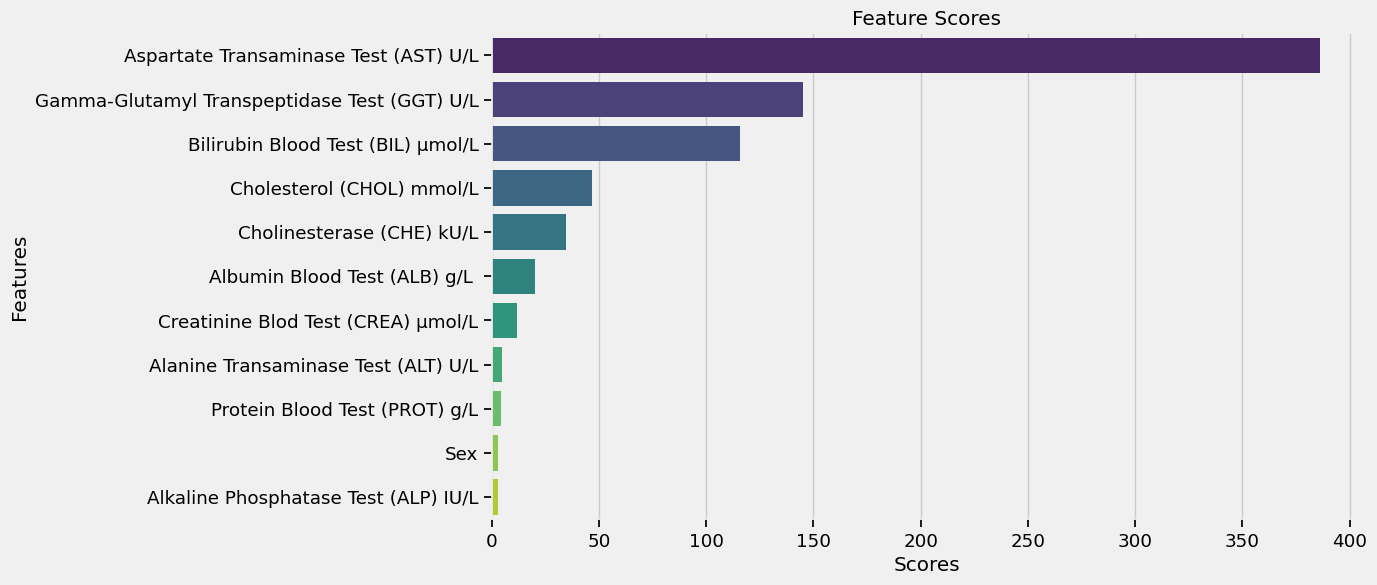

In [35]:
# Feature selection using SelectKBest with ANOVA F-value
X = data.drop(["Category"], axis = 1)  
y = data["Category"] 
selector = SelectKBest(f_classif, k=11)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

# Create a DataFrame to store the feature names and their scores
feature_scores_data_set = pd.DataFrame({'Features': selected_features, 'Scores': feature_scores})

# Sort the DataFrame by score in descending order
feature_scores_data_set = feature_scores_data_set.sort_values(by='Scores', ascending=False)

# Plot the feature scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Scores', y='Features', data=feature_scores_data_set, palette='viridis')
plt.title('Feature Scores')
plt.xlabel('Scores')
plt.ylabel('Features')
plt.show()

In [36]:
X.head()

,Age,Sex,Albumin Blood Test (ALB) g/L,Alkaline Phosphatase Test (ALP) IU/L,Alanine Transaminase Test (ALT) U/L,Aspartate Transaminase Test (AST) U/L,Bilirubin Blood Test (BIL) µmol/L,Cholinesterase (CHE) kU/L,Cholesterol (CHOL) mmol/L,Creatinine Blod Test (CREA) µmol/L,Gamma-Glutamyl Transpeptidase Test (GGT) U/L,Protein Blood Test (PROT) g/L
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [37]:
#Features selection
X = X.drop(["Albumin Blood Test (ALB) g/L "], axis = 1)  

In [38]:

#Splitting the data into the training and testing set  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) 

In [39]:
clf_knn=KNeighborsClassifier()
parametrs_knn={'n_neighbors':[1,3,5,7,9,11], 'metric':['euclidean','manhattan','chebyshev']}
grid_clf_knn=GridSearchCV(clf_knn, parametrs_knn, cv=6, n_jobs=-1)
grid_clf_knn.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11]})

In [40]:
best_model_knn=grid_clf_knn.best_estimator_
y_pred_knn=best_model_knn.predict(X_test)

In [41]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confution matrix for model " f'{best_model_knn} : \n',cm_knn)
ac_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy score for model " f'{best_model_knn} : ',ac_knn)
cr_knn = classification_report(y_test, y_pred_knn)
print("classification_report for model " f'{best_model_knn} : \n',cr_knn)

Confution matrix for model KNeighborsClassifier(metric='euclidean', n_neighbors=1) : 
 [[153   3]
 [ 10  19]]
Accuracy score for model KNeighborsClassifier(metric='euclidean', n_neighbors=1) :  0.9297297297297298
classification_report for model KNeighborsClassifier(metric='euclidean', n_neighbors=1) : 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       156
           1       0.86      0.66      0.75        29

    accuracy                           0.93       185
   macro avg       0.90      0.82      0.85       185
weighted avg       0.93      0.93      0.93       185



# Random Forest Using Grid Search

In [42]:
clf_rnf=RandomForestClassifier( random_state =46)
parametrs_rnf={'n_estimators':[3,5,7,10], 'max_depth':[2,3,4,5,6]}
grid_forest=GridSearchCV(clf_rnf, parametrs_rnf, cv=6, n_jobs=-1)
grid_forest.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=RandomForestClassifier(random_state=46), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [3, 5, 7, 10]})

In [43]:
best_model_rnf=grid_forest.best_estimator_
y_pred_rnf=best_model_rnf.predict(X_test)

# Best Model for C

In [44]:
print("Random Forest Best parameters: ", grid_forest.best_params_)

Random Forest Best parameters:  {'max_depth': 5, 'n_estimators': 10}


In [45]:

ac_rnf = accuracy_score(y_test, y_pred_rnf)
print("Accuracy score for model " f'{best_model_rnf} : ',ac_rnf)
cr_rnf = classification_report(y_test, y_pred_rnf)
print("classification_report for model " f'{best_model_rnf} : \n',cr_rnf)

Accuracy score for model RandomForestClassifier(max_depth=5, n_estimators=10, random_state=46) :  0.9513513513513514
classification_report for model RandomForestClassifier(max_depth=5, n_estimators=10, random_state=46) : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       156
           1       1.00      0.69      0.82        29

    accuracy                           0.95       185
   macro avg       0.97      0.84      0.89       185
weighted avg       0.95      0.95      0.95       185



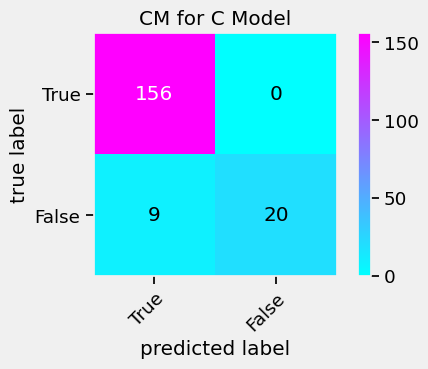

In [46]:
cm_rnf = confusion_matrix(y_test, y_pred_rnf)
fig, ax = plot_confusion_matrix(conf_mat=cm_rnf ,
                                show_absolute=True,
                                colorbar=True,
                                cmap='cool',
                               class_names = [True , False ],
                               figsize=(5, 3))
plt.title("CM for C Model")
plt.show()

In [47]:
clf_svc=SVC()
parametrs_svc={'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}
grid_clf_svc=GridSearchCV(clf_svc, parametrs_svc, cv=6, n_jobs=-1)
grid_clf_svc.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]})

In [48]:
best_model_svc=grid_clf_svc.best_estimator_
y_pred_svc=best_model_svc.predict(X_test)

In [49]:
cm_svc = confusion_matrix(y_test, y_pred_svc)
print("Confution matrix for model " f'{best_model_svc} : \n',cm_svc)
ac_svc = accuracy_score(y_test, y_pred_svc)
print("Accuracy score for model " f'{best_model_svc} : ',ac_svc)
cr_svc = classification_report(y_test, y_pred_svc)
print("classification_report for model " f'{best_model_svc} : \n',cr_svc)

Confution matrix for model SVC(C=1, gamma=0.001) : 
 [[152   4]
 [ 10  19]]
Accuracy score for model SVC(C=1, gamma=0.001) :  0.9243243243243243
classification_report for model SVC(C=1, gamma=0.001) : 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       156
           1       0.83      0.66      0.73        29

    accuracy                           0.92       185
   macro avg       0.88      0.81      0.84       185
weighted avg       0.92      0.92      0.92       185



# Compare all algorithms:

In [50]:
print("Accuracy score for model " f'{best_model_svc} : ',ac_svc)
print("Accuracy score for model " f'{best_model_knn} : ',ac_knn)
print("Accuracy score for model " f'{best_model_rnf} : ',ac_rnf)

Accuracy score for model SVC(C=1, gamma=0.001) :  0.9243243243243243
Accuracy score for model KNeighborsClassifier(metric='euclidean', n_neighbors=1) :  0.9297297297297298
Accuracy score for model RandomForestClassifier(max_depth=5, n_estimators=10, random_state=46) :  0.9513513513513514


In [51]:
print(best_model_rnf.score(X_train,y_train))

0.9906976744186047


In [52]:
print(best_model_rnf.score(X_test,y_test))

0.9513513513513514


In [53]:
#Use Ramdomforest (best accuracy score) for creating a prediction column 
y_pred_final = best_model_rnf.predict(X_test)
X_test['predictions'] = y_pred_final 

In [54]:
X_test

,Age,Sex,Alkaline Phosphatase Test (ALP) IU/L,Alanine Transaminase Test (ALT) U/L,Aspartate Transaminase Test (AST) U/L,Bilirubin Blood Test (BIL) µmol/L,Cholinesterase (CHE) kU/L,Cholesterol (CHOL) mmol/L,Creatinine Blod Test (CREA) µmol/L,Gamma-Glutamyl Transpeptidase Test (GGT) U/L,Protein Blood Test (PROT) g/L,predictions
248,55,1,65.5,16.6,17.5,2.8,5.58,4.39,65.0,26.2,62.4,0
365,39,0,106.0,16.6,17.0,2.4,5.95,5.30,68.0,22.9,72.3,0
432,48,0,50.1,17.3,26.3,8.1,8.15,5.38,64.0,13.4,73.1,0
610,62,0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,1
132,44,1,81.7,27.5,29.5,6.4,8.81,6.65,83.0,24.1,68.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18,33,1,57.1,38.9,40.3,24.9,9.62,5.50,112.0,27.6,69.3,0
478,53,0,91.7,13.8,19.6,3.4,7.87,5.48,72.0,77.3,77.3,0
333,33,0,73.1,14.3,20.8,11.1,7.40,3.22,56.0,11.4,69.9,0
144,45,1,77.0,60.3,32.9,8.8,9.38,6.27,85.0,81.1,75.5,0


# Test my Model with new dataset

In [55]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=60)
X_resampled, y_resampled = ros.fit_resample(X, y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 540), (1, 540)]


In [56]:
y_pred_rnf=best_model_svc.predict(X_resampled)

In [57]:
ac_rnf = accuracy_score(y_resampled, y_pred_rnf)
print("Accuracy score for model " f'{best_model_rnf} : ',ac_rnf)
cr_rnf = classification_report(y_resampled, y_pred_rnf)
print("classification_report for model " f'{best_model_rnf} : \n',cr_rnf)

Accuracy score for model RandomForestClassifier(max_depth=5, n_estimators=10, random_state=46) :  0.9074074074074074
classification_report for model RandomForestClassifier(max_depth=5, n_estimators=10, random_state=46) : 
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       540
           1       0.99      0.82      0.90       540

    accuracy                           0.91      1080
   macro avg       0.92      0.91      0.91      1080
weighted avg       0.92      0.91      0.91      1080



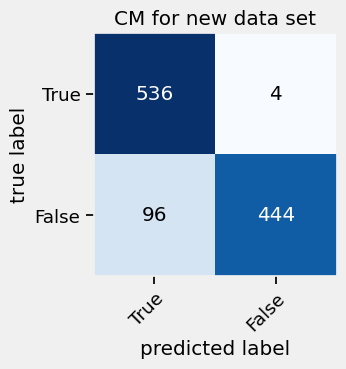

In [58]:
cm_rnf = confusion_matrix(y_resampled, y_pred_rnf)
fig, ax = plot_confusion_matrix(conf_mat=cm_rnf , show_absolute=True, class_names = [True , False ],figsize=(5, 3))
plt.title('CM for new data set')
plt.show()

# Saving the model

In [59]:
pickle.dump(best_model_rnf, open('Cmodel.pkl' , 'wb'))
model = pickle.load(open('Cmodel.pkl' , 'rb'))

# Test the saved model

In [60]:
print(model.predict([[32,1,52.5,7.7,22.1,7.5,6.9,3.2,106,12,70]]))
print(model.predict([[50,1,230,200,300,220,15,9,320,600,80]]))

[0]
[1]
